# Proyek Kedua : Menyelesaikan Permasalahan Dropout Student Jaya-jaya Institute
- Nama : Nurnia Hamid
- Email : nurniahamid@gmail.com
- ID : A309XAF385

#### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import collections
from sklearn.preprocessing import StandardScaler




#### Menyiapkan data yang akan digunakan

In [2]:
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv"
df = pd.read_csv(url, sep=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Data Understanding

In [3]:
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [5]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
df.duplicated().sum()

np.int64(0)

# Data Preparation / Data Preprocessing

In [7]:
df_dashboard = df.copy()

marital_status_map = {
    1: 'single',
    2: 'married',
    3: 'widower',
    4: 'divorced',
    5: 'facto union',
    6: 'legally separated'
}
df_dashboard['Marital_status'] = df_dashboard['Marital_status'].map(marital_status_map)

In [8]:
gender_map = {
    0: 'female',
    1: 'male'
}
df_dashboard['Gender'] = df_dashboard['Gender'].map(gender_map)

In [9]:
binary_map = {
    0: 'no',
    1: 'yes'
}
df_dashboard['Displaced'] = df_dashboard['Displaced'].map(binary_map)
df_dashboard['Educational_special_needs'] = df_dashboard['Educational_special_needs'].map(binary_map)
df_dashboard['Debtor'] = df_dashboard['Debtor'].map(binary_map)
df_dashboard['Tuition_fees_up_to_date'] = df_dashboard['Tuition_fees_up_to_date'].map(binary_map)
df_dashboard['Scholarship_holder'] = df_dashboard['Scholarship_holder'].map(binary_map)
df_dashboard['International'] = df_dashboard['International'].map(binary_map)


In [10]:
df_dashboard.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [11]:
df_dashboard['Status'].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


In [12]:
df_dashboard['Status'] = df_dashboard['Status'].replace({
    'Graduate' : 'No Dropout',
    'Enrolled' : 'No Dropout',
    'Dropout' : 'Dropout'
})

In [13]:
df_dashboard['Status'].value_counts()

,count
Status,
No Dropout,3003
Dropout,1421


In [14]:
application_mode_map = {
    1: '1st phase - general',
    2: 'Ordinance 612/93',
    5: '1st phase - Azores',
    7: 'Other higher courses',
    10: 'Ordinance 854-B/99',
    15: 'International student',
    16: '1st phase - Madeira',
    17: '2nd phase - general',
    18: '3rd phase - general',
    26: 'Different Plan',
    27: 'Other Institution',
    39: 'Over 23 years',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological diploma',
    51: 'Change institution/course',
    53: 'Short cycle diploma',
    57: 'Change institution/course (Int.)'
}
df_dashboard['Application_mode'] = df_dashboard['Application_mode'].map(application_mode_map)


In [15]:
course_map = {
    33: 'Biofuel Tech',
    171: 'Animation Design',
    8014: 'Social Service (Evening)',
    9003: 'Agronomy',
    9070: 'Comm Design',
    9085: 'Vet Nursing',
    9119: 'Informatics Eng',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Marketing',
    9773: 'Journalism',
    9853: 'Basic Education',
    9991: 'Management (Evening)'
}
df_dashboard['Course'] = df_dashboard['Course'].map(course_map)


In [16]:
attendance_map = {
    1: 'daytime',
    0: 'evening'
}
df_dashboard['Daytime_evening_attendance'] = df_dashboard['Daytime_evening_attendance'].map(attendance_map)


In [17]:
prev_qualification_map = {
    1: 'Secondary education',
    2: 'Bachelor degree',
    3: 'Degree',
    4: 'Master',
    5: 'Doctorate',
    6: 'Ongoing higher ed',
    9: '12th not completed',
    10: '11th not completed',
    12: 'Other - 11th',
    14: '10th',
    15: '10th not completed',
    19: 'Basic ed 3rd cycle',
    38: 'Basic ed 2nd cycle',
    39: 'Tech specialization',
    40: 'Degree (1st cycle)',
    42: 'Prof. tech course',
    43: 'Master (2nd cycle)'
}
df_dashboard['Previous_qualification'] = df_dashboard['Previous_qualification'].map(prev_qualification_map)


In [18]:
nacionality_map = {
    1: 'Portuguese',
    2: 'German',
    6: 'Spanish',
    11: 'Italian',
    13: 'Dutch',
    14: 'English',
    17: 'Lithuanian',
    21: 'Angolan',
    22: 'Cape Verdean',
    24: 'Guinean',
    25: 'Mozambican',
    26: 'Santomean',
    32: 'Turkish',
    41: 'Brazilian',
    62: 'Romanian',
    100: 'Moldovan',
    101: 'Mexican',
    103: 'Ukrainian',
    105: 'Russian',
    108: 'Cuban',
    109: 'Colombian'
}
df_dashboard['Nacionality'] = df_dashboard['Nacionality'].map(nacionality_map)


In [19]:
mothers_qualification_map = {
    1: 'Secondary Education - 12th Year or Eq.',
    2: 'Higher Ed - Bachelor',
    3: 'Higher Ed - Degree',
    4: 'Higher Ed - Master',
    5: 'Higher Ed - Doctorate',
    6: 'Attended Higher Ed',
    9: '12th Year - Not Completed',
    10: '11th Year - Not Completed',
    11: '7th Year (Old)',
    12: 'Other - 11th Year',
    14: '10th Year',
    18: 'General Commerce Course',
    19: 'Basic Ed 3rd Cycle',
    22: 'Technical-Professional Course',
    26: '7th Year of Schooling',
    27: '2nd Cycle High School',
    29: '9th Year - Not Completed',
    30: '8th Year',
    34: 'Unknown',
    35: "Can't Read/Write",
    36: 'Can Read w/o 4th Year',
    37: 'Basic Ed 1st Cycle (4th/5th)',
    38: 'Basic Ed 2nd Cycle (6th–8th)',
    39: 'Technological Spec. Course',
    40: 'Higher Ed - Degree (1st Cycle)',
    41: 'Specialized Higher Studies',
    42: 'Professional Higher Tech Course',
    43: 'Higher Ed - Master (2nd Cycle)',
    44: 'Higher Ed - Doctorate (3rd Cycle)'
}


In [20]:
fathers_qualification_map = {
    1: 'Secondary Education - 12th Year or Eq.',
    2: 'Higher Ed - Bachelor',
    3: 'Higher Ed - Degree',
    4: 'Higher Ed - Master',
    5: 'Higher Ed - Doctorate',
    6: 'Attended Higher Ed',
    9: '12th Year - Not Completed',
    10: '11th Year - Not Completed',
    11: '7th Year (Old)',
    12: 'Other - 11th Year',
    13: '2nd Year Comp. HS Course',
    14: '10th Year',
    18: 'General Commerce Course',
    19: 'Basic Ed 3rd Cycle',
    20: 'Complementary HS Course',
    22: 'Technical-Professional Course',
    25: 'Comp. HS - Not Completed',
    26: '7th Year of Schooling',
    27: '2nd Cycle High School',
    29: '9th Year - Not Completed',
    30: '8th Year',
    31: 'Admin & Commerce Course',
    33: 'Supp. Accounting & Admin',
    34: 'Unknown',
    35: "Can't Read/Write",
    36: 'Can Read w/o 4th Year',
    37: 'Basic Ed 1st Cycle (4th/5th)',
    38: 'Basic Ed 2nd Cycle (6th–8th)',
    39: 'Technological Spec. Course',
    40: 'Higher Ed - Degree (1st Cycle)',
    41: 'Specialized Higher Studies',
    42: 'Professional Higher Tech Course',
    43: 'Higher Ed - Master (2nd Cycle)',
    44: 'Higher Ed - Doctorate (3rd Cycle)'
}


In [21]:
mothers_occupation_map = {
    0: 'Student',
    1: 'Legislative/Executive/Director',
    2: 'Intellectual/Scientific',
    3: 'Technicians',
    4: 'Admin Staff',
    5: 'Service/Security/Sellers',
    6: 'Agriculture/Fish/Forestry',
    7: 'Industry/Construction/Craftsmen',
    8: 'Machine Operators',
    9: 'Unskilled Workers',
    10: 'Armed Forces',
    90: 'Other',
    99: 'Blank',
    122: 'Health Professionals',
    123: 'Teachers',
    125: 'ICT Specialists',
    131: 'Science/Eng. Tech (Intermediate)',
    132: 'Health Tech (Intermediate)',
    134: 'Legal/Social/Sports/Cultural (Inter.)',
    141: 'Secretaries/Data Ops',
    143: 'Finance/Statistical/Data Operators',
    144: 'Other Admin Support',
    151: 'Personal Services',
    152: 'Sellers',
    153: 'Personal Care',
    171: 'Skilled Construction',
    173: 'Printing/Jewelers/Artisans',
    175: 'Food/Wood/Textile Industries',
    191: 'Cleaning Workers',
    192: 'Unskilled Agri/Fish/Forestry',
    193: 'Unskilled Industry/Transport',
    194: 'Meal Prep Assistants'
}


In [22]:
fathers_occupation_map = {
    0: 'Student',
    1: 'Legislative/Executive/Director',
    2: 'Intellectual/Scientific',
    3: 'Technicians',
    4: 'Admin Staff',
    5: 'Service/Security/Sellers',
    6: 'Agriculture/Fish/Forestry',
    7: 'Industry/Construction/Craftsmen',
    8: 'Machine Operators',
    9: 'Unskilled Workers',
    10: 'Armed Forces',
    90: 'Other',
    99: 'Blank',
    101: 'Armed Forces Officers',
    102: 'Armed Forces Sergeants',
    103: 'Other Armed Forces',
    112: 'Admin/Commercial Directors',
    114: 'Hotel/Trade Directors',
    121: 'Physical Sciences/Eng.',
    122: 'Health Professionals',
    123: 'Teachers',
    124: 'Finance/Admin Specialists',
    131: 'Science/Eng. Tech (Intermediate)',
    132: 'Health Tech (Intermediate)',
    134: 'Legal/Social/Cultural (Intermediate)',
    135: 'ICT Techs',
    141: 'Secretaries/Data Ops',
    143: 'Finance/Statistical/Data Operators',
    144: 'Other Admin Support',
    151: 'Personal Services',
    152: 'Sellers',
    153: 'Personal Care',
    154: 'Security Personnel',
    161: 'Skilled Farmers/Agri',
    163: 'Subsistence Farmers/Fishers',
    171: 'Skilled Construction',
    172: 'Metal Workers',
    174: 'Electrical Workers',
    175: 'Food/Wood/Textile Industries',
    181: 'Plant/Machine Operators',
    182: 'Assembly Workers',
    183: 'Drivers/Equipment Operators',
    192: 'Unskilled Agri/Fish/Forestry',
    193: 'Unskilled Industry/Transport',
    194: 'Meal Prep Assistants',
    195: 'Street Vendors'
}


In [23]:
df_dashboard['Mothers_qualification'] = df_dashboard['Mothers_qualification'].map(mothers_qualification_map)
df_dashboard['Fathers_qualification'] = df_dashboard['Fathers_qualification'].map(fathers_qualification_map)
df_dashboard['Mothers_occupation'] = df_dashboard['Mothers_occupation'].map(mothers_occupation_map)
df_dashboard['Fathers_occupation'] = df_dashboard['Fathers_occupation'].map(fathers_occupation_map)

In [24]:
df_dashboard

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,2nd phase - general,5,Animation Design,daytime,Secondary education,122.0,Portuguese,Basic Ed 3rd Cycle,Other - 11th Year,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student,1,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year or Eq.,Higher Ed - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,No Dropout
2,single,1st phase - general,5,Comm Design,daytime,Secondary education,122.0,Portuguese,Basic Ed 1st Cycle (4th/5th),Basic Ed 1st Cycle (4th/5th),...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general,2,Journalism,daytime,Secondary education,122.0,Portuguese,Basic Ed 2nd Cycle (6th–8th),Basic Ed 1st Cycle (4th/5th),...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,No Dropout
4,married,Over 23 years,1,Social Service (Evening),evening,Secondary education,100.0,Portuguese,Basic Ed 1st Cycle (4th/5th),Basic Ed 2nd Cycle (6th–8th),...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,No Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1st phase - general,6,Journalism,daytime,Secondary education,125.0,Portuguese,Secondary Education - 12th Year or Eq.,Secondary Education - 12th Year or Eq.,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,No Dropout
4420,single,1st phase - general,2,Journalism,daytime,Secondary education,120.0,Russian,Secondary Education - 12th Year or Eq.,Secondary Education - 12th Year or Eq.,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,single,1st phase - general,1,Nursing,daytime,Secondary education,154.0,Portuguese,Basic Ed 1st Cycle (4th/5th),Basic Ed 1st Cycle (4th/5th),...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,single,1st phase - general,1,Management,daytime,Secondary education,180.0,Portuguese,Basic Ed 1st Cycle (4th/5th),Basic Ed 1st Cycle (4th/5th),...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,No Dropout


#### Korelasi antar fitur dengan kolom target ('Status')

In [25]:
df_dashboard['Dropout_flag'] = df_dashboard['Status'].apply(lambda x: 1 if x == 'Dropout' else 0)

In [26]:
df_corr_ready = pd.get_dummies(df_dashboard, drop_first=True)
corr = df_corr_ready.corr()
cor_target = corr['Dropout_flag'].drop('Dropout_flag').sort_values(ascending=False)
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(cor_target)

Age_at_enrollment                                               0.254215
Application_mode_Over 23 years                                  0.231699
Debtor_yes                                                      0.229407
Gender_male                                                     0.203983
Mothers_qualification_Unknown                                   0.155484
Mothers_occupation_Student                                      0.143891
Fathers_qualification_Unknown                                   0.138755
Previous_qualification_Basic ed 3rd cycle                       0.133933
Fathers_occupation_Student                                      0.118081
Application_mode_Other higher courses                           0.111978
Mothers_occupation_Other                                        0.110620
Course_Management (Evening)                                     0.101295
Fathers_occupation_Other                                        0.101075
Previous_qualification_Degree                      

Fitur berkorelasi Dropout :
- age_atenrollment = +0.254 = semakin tua umur saat masuk kuliah, makin berpotensi dropout
- application_mode_over 23 yers = +0.231 = Pelamar berusia > 23 tahun punya kemungkinan lebih tinggi dropout
- Debtor_yes = +0.229 Mahasiswa yang punya tunggakan cenderung dropout
- Gender_male = +0.204 = Mahasiswa laki-laki cenderung lebih berisiko dropout dibanding perempuan
- Mothers_qualification_Unknown = +0.155
= Ketidaktahuan latar belakang pendidikan ibu bisa berkaitan dengan resiko dropout
- Mothers_occupation_Student, Fathers_qualification_Unknown, Fathers_occupation_Student = +0.11 – +0.14 = Orang tua yang statusnya pelajar atau tidak diketahui cenderung berkorelasi positif dengan dropout

Kesimpulan sementara :
- Mahasiswa lebih tua
- Latar belakang keluarga yang tidak jelas atau rendag
- Masalah Keuangan (Debtor)
- Pria - lebih rawan dropout




Fitur yang Berkorelasi Negatif (→ bertahan, tidak dropout):

- Tuition_fees_up_to_date_yes =	-0.43	= Mahasiswa yang membayar tepat waktu cenderung tidak dropout

- Curricular_units_1st/2nd_sem_grade	= -0.48 / -0.57	= Semakin tinggi nilai, semakin kecil risiko dropout

- Curricular_units_1st/2nd_sem_approved	-0.47 / -0.56	Semakin banyak mata kuliah yang lulus, makin aman dari dropout

- Admission_grade	-0.09	Semakin tinggi nilai masuk, makin kecil risiko dropout

- Scholarship_holder_yes	-0.24	Mahasiswa penerima beasiswa lebih cenderung bertahan

Kesimpulan Sementara :
- Nilai bagus
- Lulus mata kuliah dengan baik
- Disiplin bayar kuliah
- Punya beasiswa
→ lebih besar kemungkinan tidak dropout.



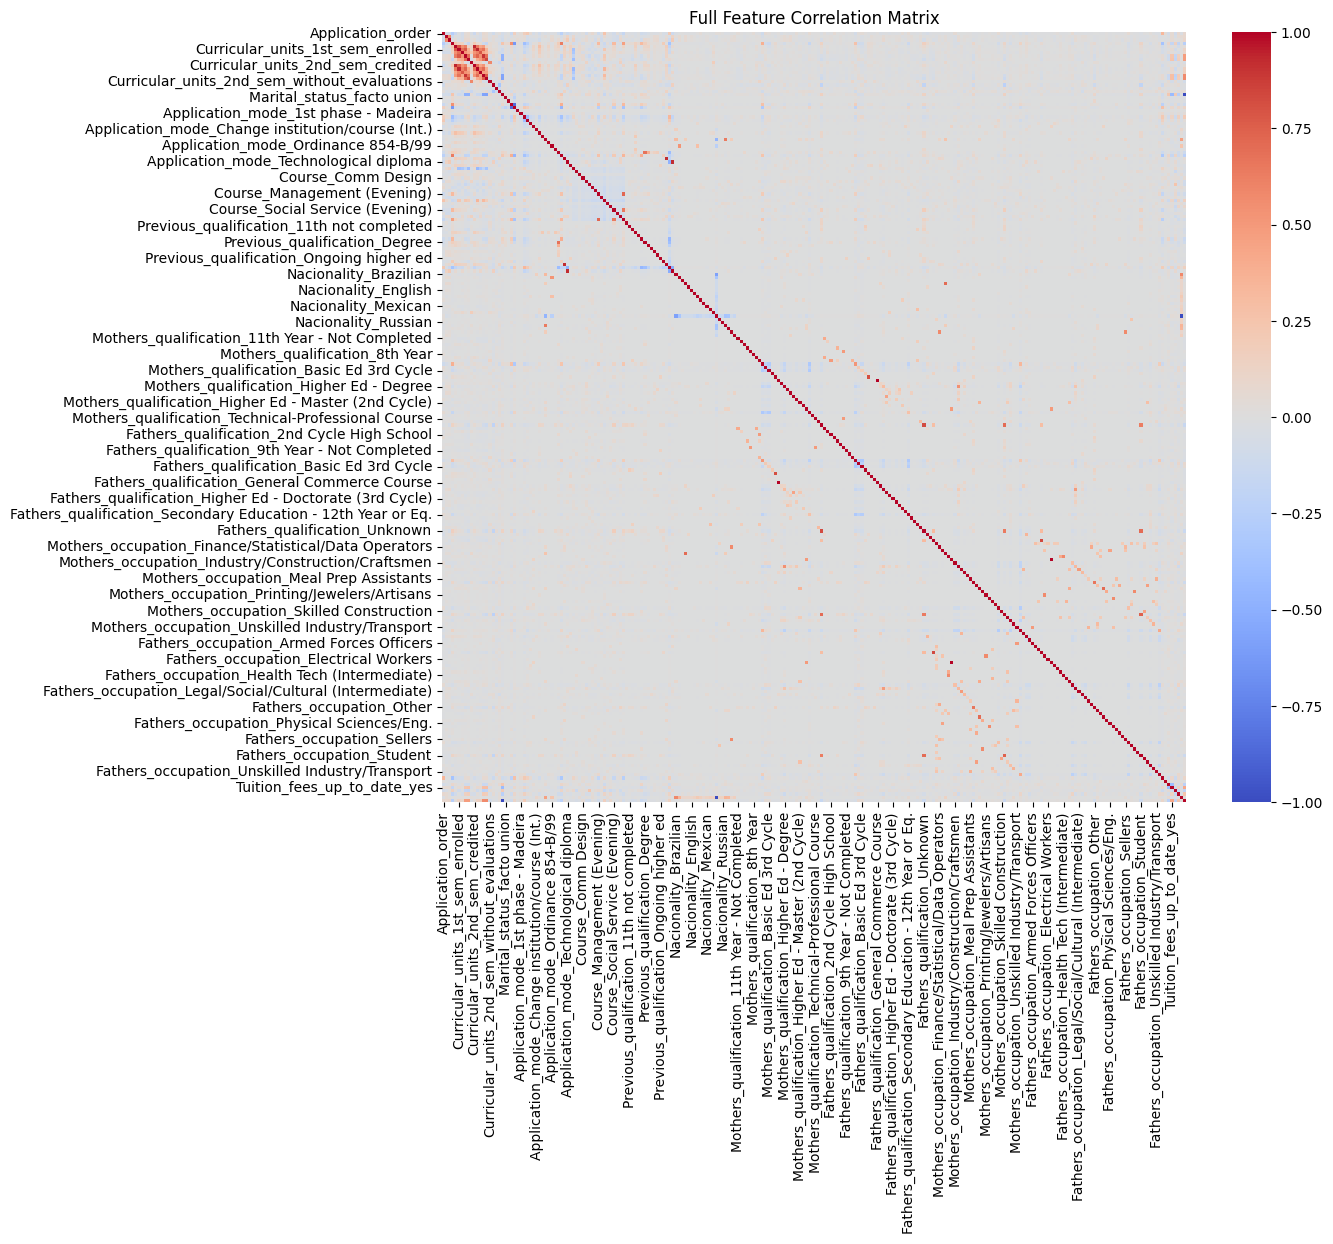

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(df_corr_ready.corr(), cmap='coolwarm', center=0)
plt.title("Full Feature Correlation Matrix")
plt.show()

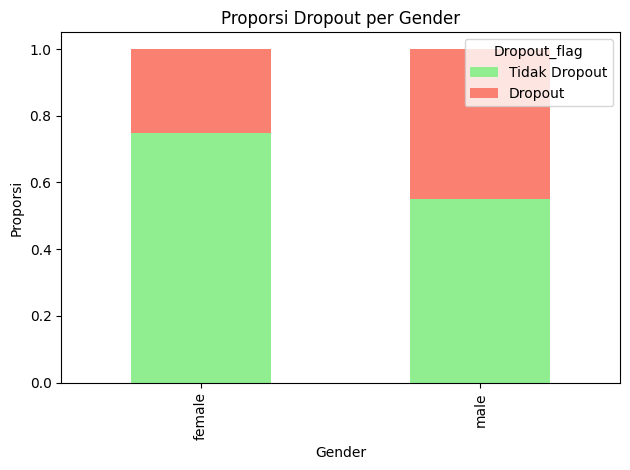

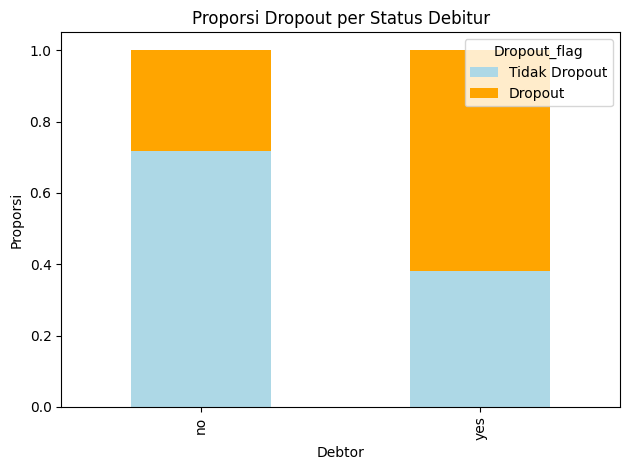

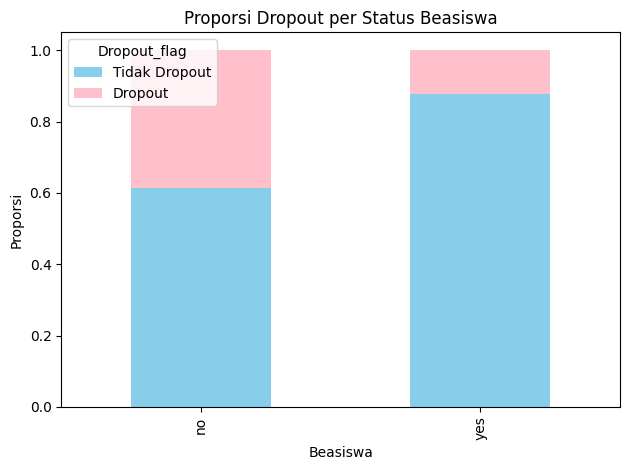

/tmp/ipython-input-28-1828195098.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_dashboard, x='Dropout_flag', y='Age_at_enrollment', palette='Set2')


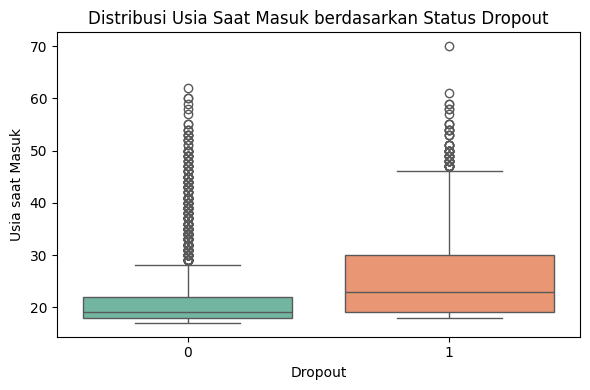

In [28]:
import matplotlib.pyplot as plt

# 1. Gender
prop_gender = df_dashboard.groupby('Gender')['Dropout_flag'].value_counts(normalize=True).unstack()
prop_gender.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.title('Proporsi Dropout per Gender')
plt.xlabel('Gender')
plt.ylabel('Proporsi')
plt.legend(title='Dropout_flag', labels=['Tidak Dropout', 'Dropout'])
plt.tight_layout()
plt.show()

# 2. Debtor
prop_debtor = df_dashboard.groupby('Debtor')['Dropout_flag'].value_counts(normalize=True).unstack()
prop_debtor.plot(kind='bar', stacked=True, color=['lightblue', 'orange'])
plt.title('Proporsi Dropout per Status Debitur')
plt.xlabel('Debtor')
plt.ylabel('Proporsi')
plt.legend(title='Dropout_flag', labels=['Tidak Dropout', 'Dropout'])
plt.tight_layout()
plt.show()

# 3. Scholarship Holder
prop_scholarship = df_dashboard.groupby('Scholarship_holder')['Dropout_flag'].value_counts(normalize=True).unstack()
prop_scholarship.plot(kind='bar', stacked=True, color=['skyblue', 'pink'])
plt.title('Proporsi Dropout per Status Beasiswa')
plt.xlabel('Beasiswa')
plt.ylabel('Proporsi')
plt.legend(title='Dropout_flag', labels=['Tidak Dropout', 'Dropout'])
plt.tight_layout()
plt.show()

# 4. Age at Enrollment tetap menggunakan boxplot
plt.figure(figsize=(6,4))
sns.boxplot(data=df_dashboard, x='Dropout_flag', y='Age_at_enrollment', palette='Set2')
plt.title('Distribusi Usia Saat Masuk berdasarkan Status Dropout')
plt.xlabel('Dropout')
plt.ylabel('Usia saat Masuk')
plt.tight_layout()
plt.show()


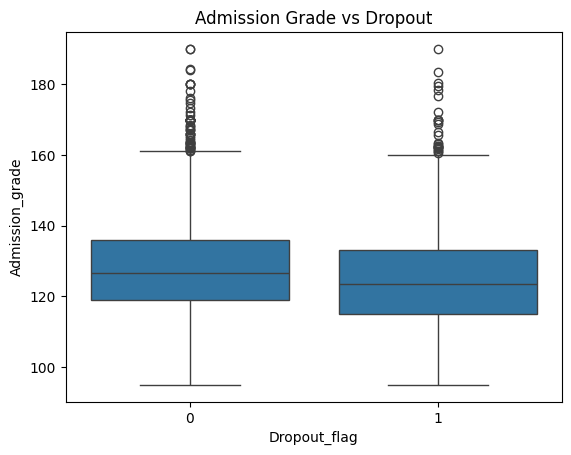

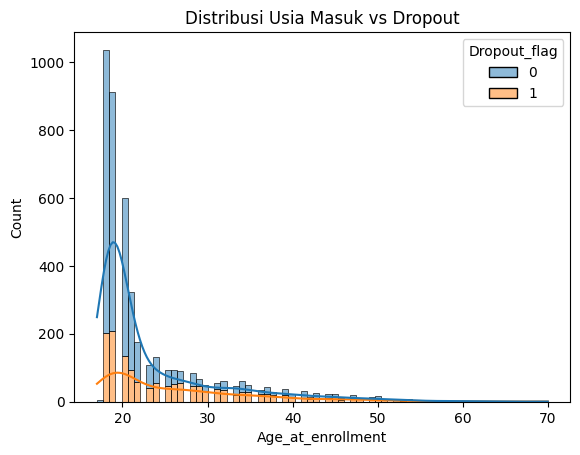

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Admission Grade vs Dropout
sns.boxplot(x='Dropout_flag', y='Admission_grade', data=df_dashboard)
plt.title('Admission Grade vs Dropout')
plt.show()

# Histogram: Age at enrollment per Dropout status
sns.histplot(data=df_dashboard, x='Age_at_enrollment', hue='Dropout_flag', kde=True, multiple="stack")
plt.title('Distribusi Usia Masuk vs Dropout')
plt.show()


#### Uji Chi-Square

In [30]:
from scipy.stats import chi2_contingency

def chi_square_test(feature):
    table = pd.crosstab(df_dashboard[feature], df_dashboard['Dropout_flag'])
    chi2, p, _, _ = chi2_contingency(table)
    print(f'Feature: {feature} | p-value: {p:.4f} | Significant: {p < 0.05}')

#for col in ['Gender', 'Debtor', 'Scholarship_holder', 'Marital_status', 'Age_at_enrollment', 'Mothers_qualification', 'Fathers_qualification',  ]:
 #   chi_square_test(col)

for col in [
    'Gender',
    'Debtor',
    'Scholarship_holder',
    'Marital_status',
    'Mothers_qualification',
    'Fathers_qualification',
    'Application_mode',
    'Application_order',
    'Course',
    'Daytime_evening_attendance',
    'Previous_qualification',
    'Nacionality',
    'Mothers_occupation',
    'Fathers_occupation',
    'Displaced',
    'Educational_special_needs',
    'Tuition_fees_up_to_date',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled' ,
    'Curricular_units_1st_sem_evaluations' ,
    'Curricular_units_1st_sem_approved' ,
    'Curricular_units_1st_sem_grade' ,
    'Curricular_units_1st_sem_without_evaluations' ,
    'Curricular_units_2nd_sem_credited' ,
    'Curricular_units_2nd_sem_enrolled' ,
    'Curricular_units_2nd_sem_evaluations' ,
    'Curricular_units_2nd_sem_approved' ,
    'Curricular_units_2nd_sem_grade' ,
    'Curricular_units_2nd_sem_without_evaluations' ,
    'Unemployment_rate' ,
    'International', ] :
     chi_square_test(col)

Feature: Gender | p-value: 0.0000 | Significant: True
Feature: Debtor | p-value: 0.0000 | Significant: True
Feature: Scholarship_holder | p-value: 0.0000 | Significant: True
Feature: Marital_status | p-value: 0.0000 | Significant: True
Feature: Mothers_qualification | p-value: 0.0000 | Significant: True
Feature: Fathers_qualification | p-value: 0.0000 | Significant: True
Feature: Application_mode | p-value: 0.0000 | Significant: True
Feature: Application_order | p-value: 0.0000 | Significant: True
Feature: Course | p-value: 0.0000 | Significant: True
Feature: Daytime_evening_attendance | p-value: 0.0000 | Significant: True
Feature: Previous_qualification | p-value: 0.0000 | Significant: True
Feature: Nacionality | p-value: 0.6093 | Significant: False
Feature: Mothers_occupation | p-value: 0.0000 | Significant: True
Feature: Fathers_occupation | p-value: 0.0000 | Significant: True
Feature: Displaced | p-value: 0.0000 | Significant: True
Feature: Educational_special_needs | p-value: 0.97

In [31]:
df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [32]:
df['Dropout_flag'] = df['Status'].apply(lambda x: 1 if x == 'Dropout' else 0)

# Data Prerocesing

In [33]:
# Target kolom
target = 'Dropout_flag'

# Fitur-fitur yang paling berpengaruh
selected_features = [
    'Age_at_enrollment',
    'Application_mode',
    'Application_order',
    'Course',
    'Daytime_evening_attendance',
    'Previous_qualification',
    'Gender',
    'Debtor',
    'Scholarship_holder',
    'Marital_status',
    'Mothers_qualification',
    'Fathers_qualification',
    'Application_mode',
    'Application_order',
    'Course',
    'Daytime_evening_attendance',
    'Previous_qualification',
    'Mothers_occupation',
    'Fathers_occupation',
    'Displaced',
    'Tuition_fees_up_to_date',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations',
    'Unemployment_rate'
]

In [34]:
df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Dropout_flag
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,0
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,0
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,0


In [35]:
df_selected = df[selected_features + ['Dropout_flag']]

In [36]:
df_selected = df_selected.dropna()

In [37]:
df_selected['Dropout_flag'].value_counts(normalize=True)

,proportion
Dropout_flag,
0,0.678797
1,0.321203


In [38]:
X = df_selected.drop('Dropout_flag', axis=1)
y = df_selected['Dropout_flag']

In [39]:
smote = SMOTE(random_state=20241124)
X_smote, y_smote = smote.fit_resample(X, y)

y_counter = collections.Counter(y)
y_smote_counter = collections.Counter(y_smote)

df_comparison = pd.DataFrame({
    'Original': pd.Series(y_counter),
    'SMOTE': pd.Series(y_smote_counter)
})

df_comparison.loc['Total'] = [
    df_comparison['Original'].sum(),
    df_comparison['SMOTE'].sum()
]

df_comparison

,Original,SMOTE
1,1421,3003
0,3003,3003
Total,4424,6006


In [40]:
from sklearn.model_selection import train_test_split

# Split data hasil SMOTE: train, val, test
X_train, X_temp, y_train, y_temp = train_test_split(
    X_smote, y_smote,
    test_size=0.3,
    random_state=42,
    stratify=y_smote
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

print(f"Train set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Train set size: 4204
Validation set size: 901
Test set size: 901


In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f'X_train:\n{X_train}\n')
print(f'X_test:\n{X_test}')


X_train:
[[-0.49369341 -1.08314027 -0.52399864 ... -1.59958214 -0.19479593
   1.50307543]
 [-0.62551222 -1.08314027 -0.52399864 ... -1.59958214 -0.19479593
   0.42530138]
 [-0.49369341 -1.08314027  1.11383801 ...  0.70150996 -0.19479593
  -0.3060453 ]
 ...
 [-0.75733103 -1.08314027 -0.52399864 ...  0.66777306 -0.19479593
  -0.19056951]
 [ 0.56085704  1.08620924 -0.52399864 ... -0.96370132 -0.19479593
  -0.15254366]
 [ 0.03358181 -0.16972995 -0.52399864 ...  0.69721924 -0.19479593
  -0.3060453 ]]

X_test:
[[-0.62551222 -0.16972995  0.29491968 ... -1.59958214 -0.19479593
  -0.84493232]
 [-0.75733103 -1.08314027 -0.52399864 ...  0.78850237 -0.19479593
  -1.53778707]
 [ 0.16540062  1.08620924 -0.52399864 ... -1.59958214  5.29211912
  -0.71515871]
 ...
 [-0.09823699  1.88544327 -0.52399864 ...  0.75022235 -0.19479593
  -1.03739198]
 [ 2.01086392  1.08620924 -0.52399864 ...  0.25552666 -0.19479593
   1.77251894]
 [-0.49369341 -1.08314027 -0.52399864 ...  0.64169217 -0.19479593
   0.42530138]

# Modeling

### Baseline Model

Train Accuracy : 1.0
Test Accuracy  : 0.8945615982241953
Train F1 Score : 1.0
Test F1 Score  : 0.8940914158305463
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       451
           1       0.90      0.89      0.89       450

    accuracy                           0.89       901
   macro avg       0.89      0.89      0.89       901
weighted avg       0.89      0.89      0.89       901



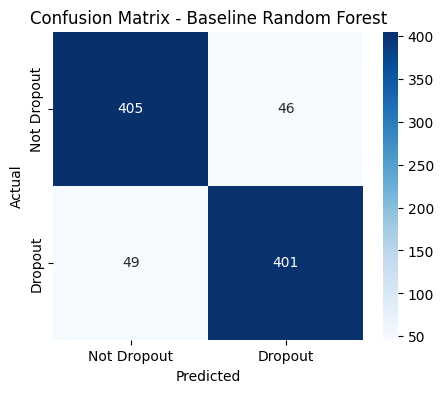

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi model dasar
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(X_train, y_train)

# Prediksi
y_train_rf = model_rf.predict(X_train)
y_test_rf = model_rf.predict(X_test)

# Evaluasi baseline model
print("Train Accuracy :", accuracy_score(y_train, y_train_rf))
print("Test Accuracy  :", accuracy_score(y_test, y_test_rf))
print("Train F1 Score :", f1_score(y_train, y_train_rf))
print("Test F1 Score  :", f1_score(y_test, y_test_rf))

# Classification report
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_rf))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_test_rf), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Dropout', 'Dropout'], yticklabels=['Not Dropout', 'Dropout'])
plt.title("Confusion Matrix - Baseline Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


###  Hyperparameter Tuning

In [43]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid
param_dist = {
    'n_estimators': [100, 250, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 10, 20],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'oob_score': [False],
    'class_weight': ['balanced']
}

rf_base = RandomForestClassifier(class_weight='balanced', random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_
print("Best Parameters:\n", random_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters:
 {'oob_score': False, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'gini', 'class_weight': 'balanced'}


# Evaluation (Model Terbaik)


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       451
           1       0.90      0.88      0.89       450

    accuracy                           0.90       901
   macro avg       0.90      0.90      0.90       901
weighted avg       0.90      0.90      0.90       901



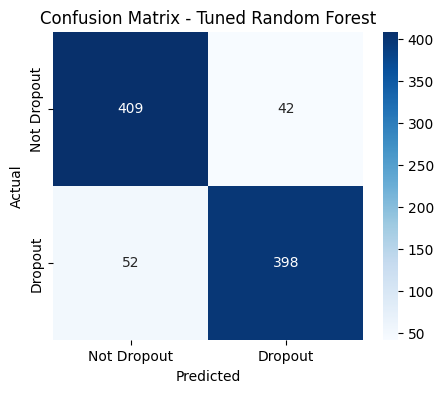

In [44]:
y_pred_best = best_rf.predict(X_test)

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_best))

# Confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Dropout', 'Dropout'], yticklabels=['Not Dropout', 'Dropout'])
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### ROC & Precision-Recall Curve

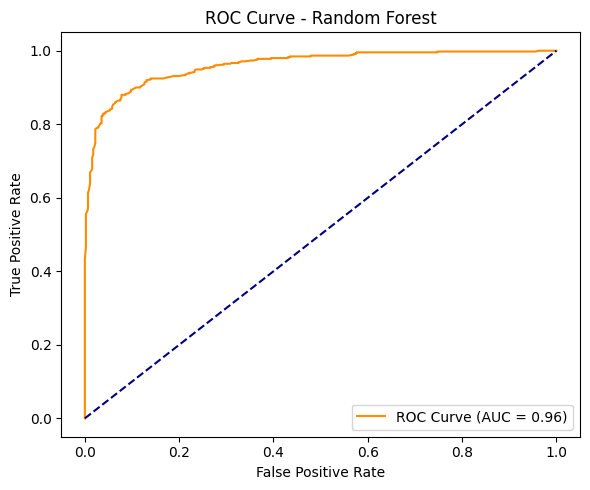

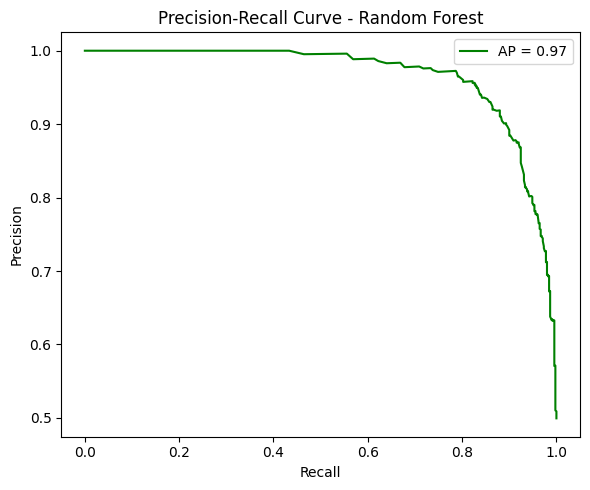

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

y_prob = best_rf.predict_proba(X_test)[:, 1]

# ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0,1], [0,1], linestyle='--', color='navy')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.tight_layout()
plt.show()

# Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f"AP = {avg_precision:.2f}", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Random Forest")
plt.legend()
plt.tight_layout()
plt.show()


### Feature Importance

/tmp/ipython-input-46-1786382667.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis')


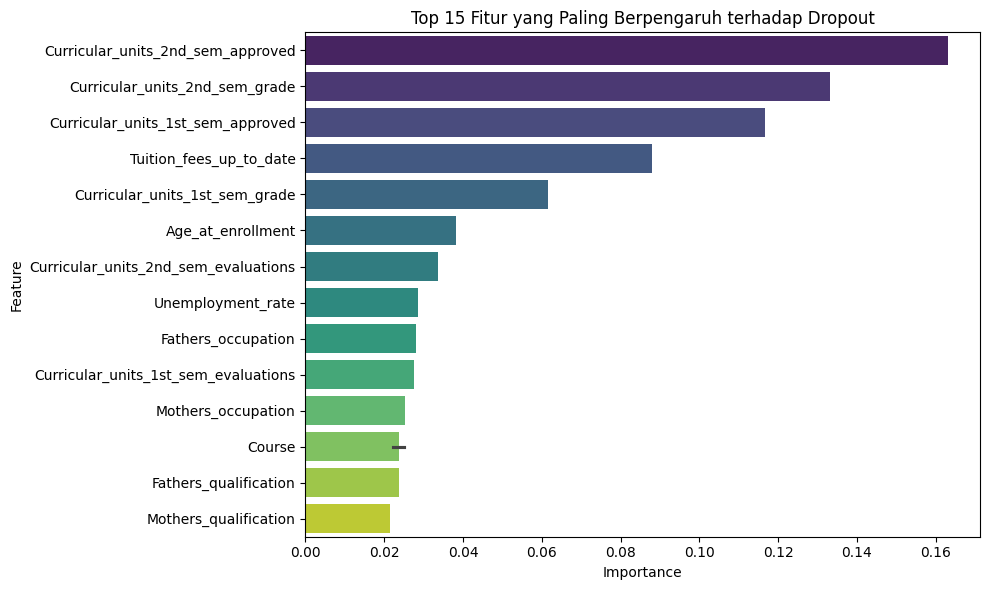

In [46]:
import pandas as pd

feature_names = df_selected.drop('Dropout_flag', axis=1).columns
importances = best_rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis')
plt.title('Top 15 Fitur yang Paling Berpengaruh terhadap Dropout')
plt.tight_layout()
plt.show()


In [47]:
import joblib
joblib.dump(best_rf, 'model_rf_best.joblib')

['model_rf_best.joblib']

In [48]:
loaded_model = joblib.load('model_rf_best.joblib')
print(loaded_model.predict(X_test[:1]))  # Cek prediksi 1 baris


[1]


In [49]:
import pandas as pd

# Ambil 5 baris dari X_test
sample = X_test[:5]
preds = loaded_model.predict(sample)

# Gabungkan dengan prediksi
pd.DataFrame(sample, columns=df_selected.drop('Dropout_flag', axis=1).columns).assign(Predicted=preds)


,Age_at_enrollment,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Gender,Debtor,Scholarship_holder,Marital_status,Mothers_qualification,Fathers_qualification,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Mothers_occupation,Fathers_occupation,Displaced,Tuition_fees_up_to_date,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Predicted
0,-0.625512,-0.169730,0.294920,0.186047,0.363226,-0.366233,-0.706602,-0.333157,-0.473904,-0.289426,-1.202959,-0.759819,-0.169730,0.294920,0.186047,0.363226,-0.366233,-0.259536,-0.318160,1.049762,0.538118,-0.290422,-0.031426,0.719716,-1.297073,-1.838416,-0.19331,-0.024226,-1.888936,-1.200827,-1.599582,-0.194796,-0.844932,1
1,-0.757331,-1.083140,-0.523999,0.311272,0.363226,-0.366233,1.415223,-0.333157,2.110132,-0.289426,1.104205,0.953886,-1.083140,-0.523999,0.311272,0.363226,-0.366233,-0.055380,-0.062603,1.049762,0.538118,-0.290422,0.393380,-0.232057,0.635436,0.717050,-0.19331,0.447291,-0.165717,0.758274,0.788502,-0.194796,-1.537787,0
2,0.165401,1.086209,-0.523999,-0.398973,-2.753106,-0.366233,-0.706602,-0.333157,-0.473904,-0.289426,0.142887,0.953886,1.086209,-0.523999,-0.398973,-2.753106,-0.366233,-0.096212,-0.147788,-0.952597,0.538118,-0.290422,-0.031426,0.481773,-0.974989,0.136551,-0.19331,-0.495744,-0.658065,-1.200827,-1.599582,5.292119,-0.715159,1
3,-0.757331,-1.083140,1.113838,0.441754,0.363226,-0.366233,-0.706602,-0.333157,-0.473904,-0.289426,-1.202959,-0.627996,-1.083140,1.113838,0.441754,0.363226,-0.366233,-0.300367,-0.318160,-0.952597,0.538118,-0.290422,-0.456232,-0.470000,-0.652904,0.237779,-0.19331,-1.910298,-1.396588,-1.200827,-1.599582,-0.194796,0.425301,1
4,-0.625512,-1.083140,-0.523999,0.392525,0.363226,-0.366233,-0.706602,-0.333157,-0.473904,-0.289426,-1.202959,-1.418937,-1.083140,-0.523999,0.392525,0.363226,-0.366233,-0.177874,-0.105195,-0.952597,0.538118,-0.290422,-0.456232,-0.470000,-0.330819,0.294136,-0.19331,-0.495744,0.080458,-0.874310,-0.425454,-0.194796,-0.498361,1


In [50]:
!pip freeze > requirements.txt

In [51]:
import joblib

selected_features = [
    'Age_at_enrollment',
    'Application_mode',
    'Application_order',
    'Course',
    'Daytime_evening_attendance',
    'Previous_qualification',
    'Gender',
    'Debtor',
    'Scholarship_holder',
    'Marital_status',
    'Mothers_qualification',
    'Fathers_qualification',
    'Mothers_occupation',
    'Fathers_occupation',
    'Displaced',
    'Tuition_fees_up_to_date',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations',
    'Unemployment_rate'
]

joblib.dump(selected_features, "feature_columns.joblib")


['feature_columns.joblib']